# Imports für das Notebook

In [80]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib import cm
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
# Einlesen der gesäuberten Daten für Exploration und Visualisierung
heart_data = pd.read_csv("../../resources/data_clean/heart_2020_clean.csv")

# Univariate Analyse
Analyse jeder Variablen einzeln, um ihre Verteilung zu verstehen

In [82]:
print(heart_data.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


Überprüfung der Datentypen der einzelnen Attribute für die weitere Verarbeitung.

## Liegt eine Herzerkrankung vor?

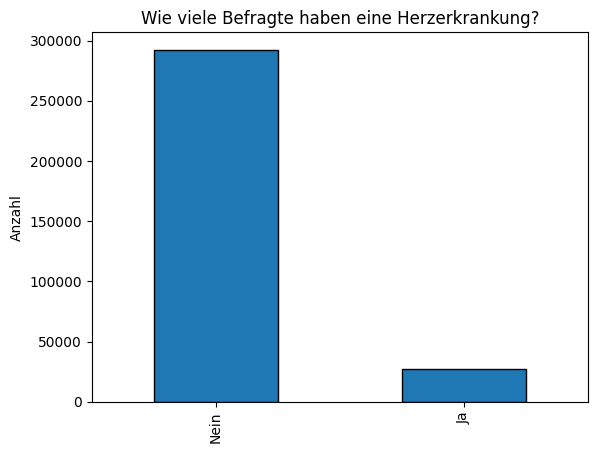

In [83]:
heart_data["HeartDisease"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte haben eine Herzerkrankung?')

plt.show()

## BMI

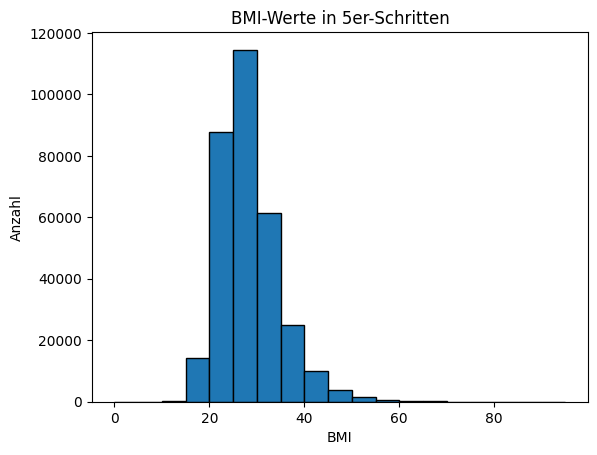

In [84]:
heart_data["BMI"].plot(kind="hist", bins=range(0, int(heart_data["BMI"].max()) + 5, 5), edgecolor='black')

plt.xlabel('BMI')
plt.ylabel('Anzahl')
plt.title('BMI-Werte in 5er-Schritten')

plt.show()


## Rauchen

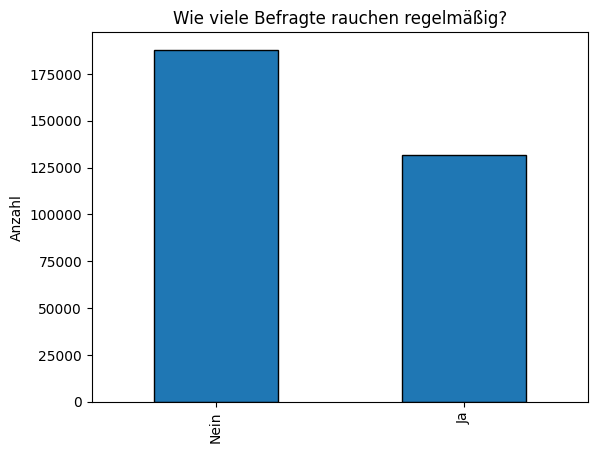

In [85]:
heart_data["Smoking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte rauchen regelmäßig?')

plt.show()

## Alkoholkonsum

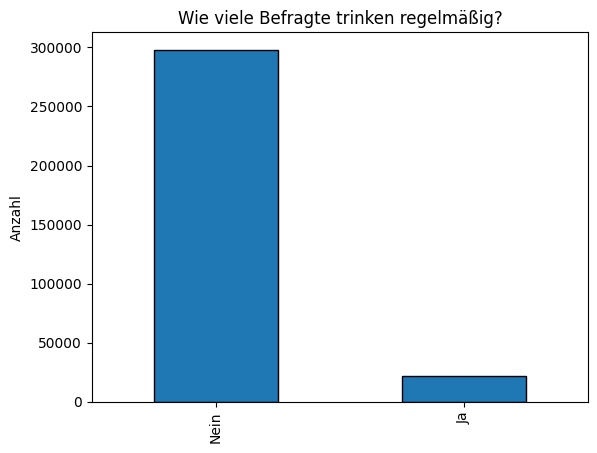

In [86]:
heart_data["AlcoholDrinking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte trinken regelmäßig?')

plt.show()

## Schlaganfall

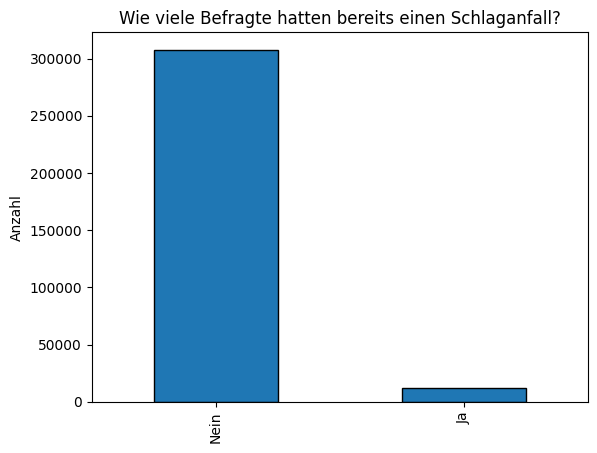

In [87]:
heart_data["Stroke"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte hatten bereits einen Schlaganfall?')

plt.show()

## Physische Gesundheit

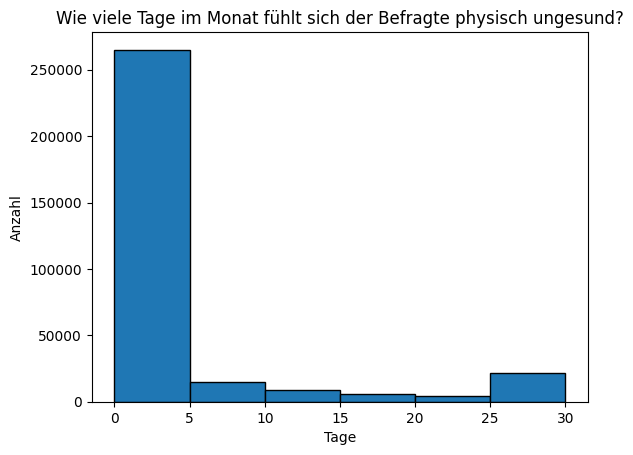

In [88]:
heart_data["PhysicalHealth"].plot(kind="hist", bins=range(0, int(heart_data["PhysicalHealth"].max()) + 5, 5), edgecolor='black')

plt.xlabel('Tage')
plt.ylabel('Anzahl')
plt.title('Wie viele Tage im Monat fühlt sich der Befragte physisch ungesund?')

plt.show()

## Mentale Gesundheit

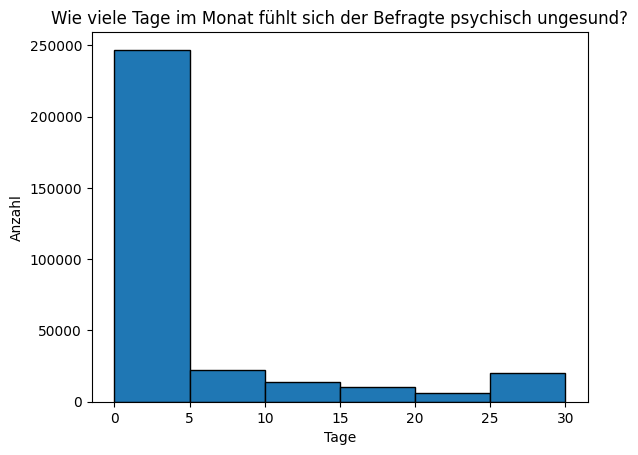

In [89]:
heart_data["MentalHealth"].plot(kind="hist", bins=range(0, int(heart_data["MentalHealth"].max()) + 5, 5), edgecolor='black')

plt.xlabel('Tage')
plt.ylabel('Anzahl')
plt.title('Wie viele Tage im Monat fühlt sich der Befragte psychisch ungesund?')

plt.show()

## Treppensteigen

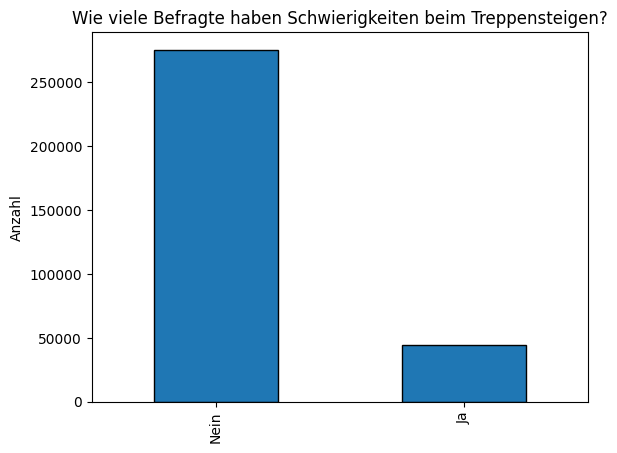

In [90]:
heart_data["DiffWalking"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Wie viele Befragte haben Schwierigkeiten beim Treppensteigen?')

plt.show()

## Geschlecht

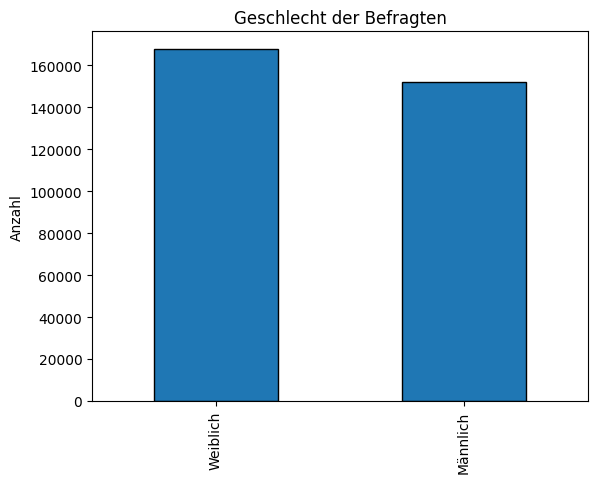

In [91]:
heart_data["Sex"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Geschlecht der Befragten')

plt.show()

## Altersgruppen

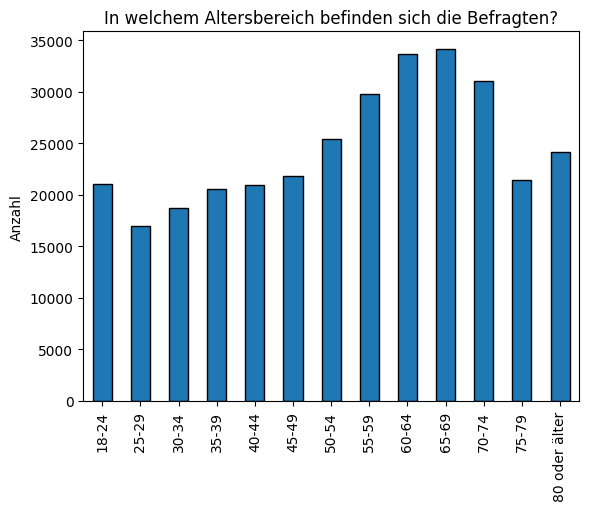

In [92]:
heart_data["AgeCategory"].value_counts().sort_index().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('In welchem Altersbereich befinden sich die Befragten?')

plt.show()

## Ethnie

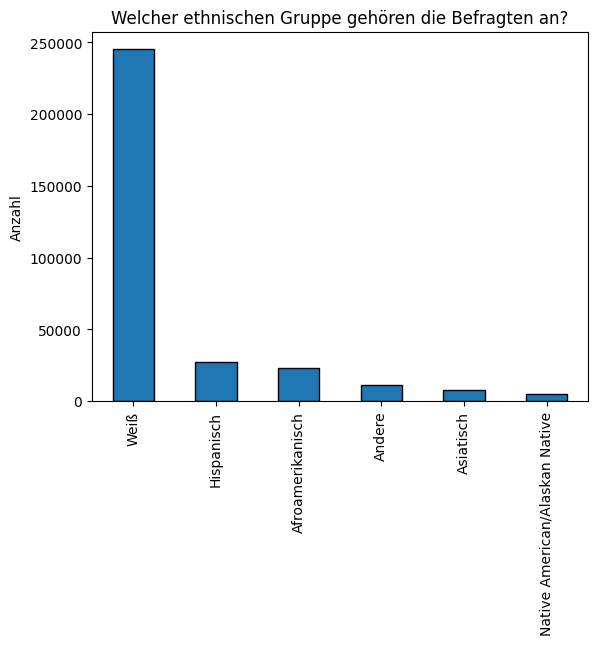

In [93]:
heart_data["Race"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Welcher ethnischen Gruppe gehören die Befragten an?')

plt.show()

## Diabetes

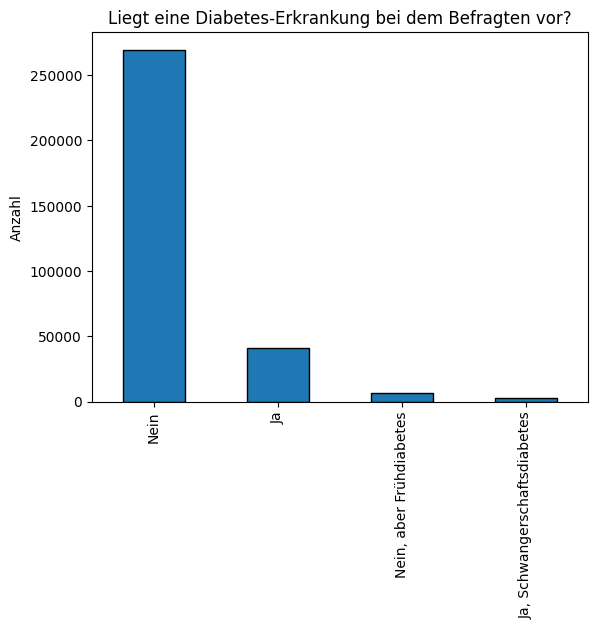

In [94]:
heart_data["Diabetic"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt eine Diabetes-Erkrankung bei dem Befragten vor?')

plt.show()

## Physische Aktivität

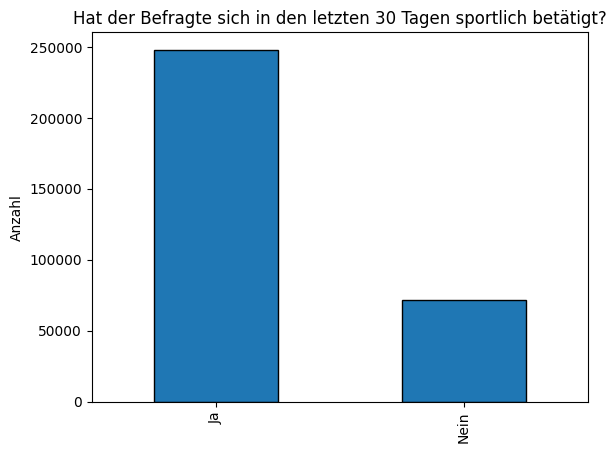

In [95]:
heart_data["PhysicalActivity"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Hat der Befragte sich in den letzten 30 Tagen sportlich betätigt?')

plt.show()

## Generelle Gesundheit

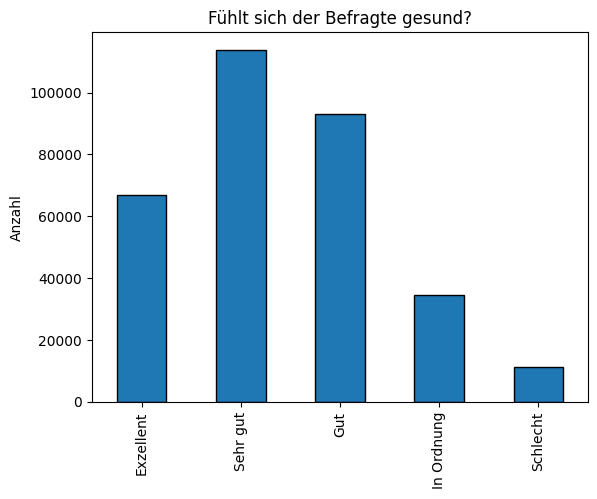

In [96]:
heart_data["GenHealth"].value_counts().reindex(['Exzellent', 'Sehr gut', 'Gut', 'In Ordnung', 'Schlecht']).plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Fühlt sich der Befragte gesund?')

plt.show()

## Schlafdauer

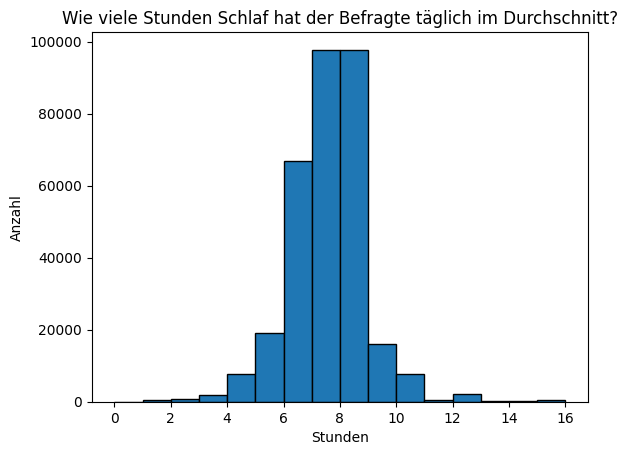

In [97]:
Q3 = np.percentile(heart_data["SleepTime"], 99.9)

heart_data_filtered = heart_data[heart_data["SleepTime"] <= Q3]
heart_data_filtered["SleepTime"].plot(kind="hist", bins=range(0, int(heart_data_filtered["SleepTime"].max()) + 1, 1), edgecolor='black')
del heart_data_filtered, Q3

plt.xlabel('Stunden')
plt.ylabel('Anzahl')
plt.title('Wie viele Stunden Schlaf hat der Befragte täglich im Durchschnitt?')

plt.show()

Der Datensatz für den Schlaf wurde angepasst, da Werte über 24 Stunden in der Befragung angegeben wurden.  
Demnach wurde alles ab dem 99,9 Percentil entfernt, um den Graphen anschaulicher zu machen.

## Asthma

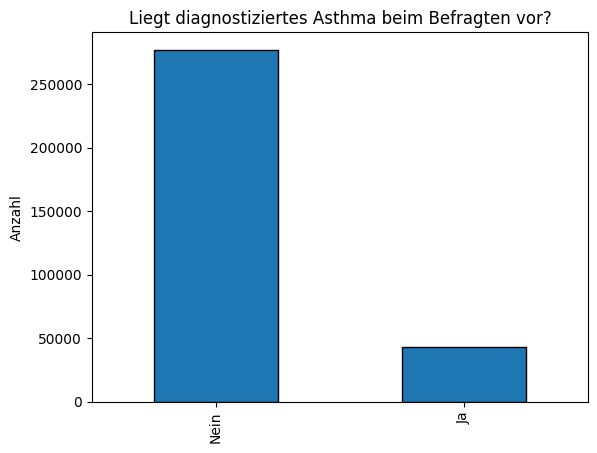

In [98]:
heart_data["Asthma"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt diagnostiziertes Asthma beim Befragten vor?')

plt.show()

## Nieren-Erkrankung

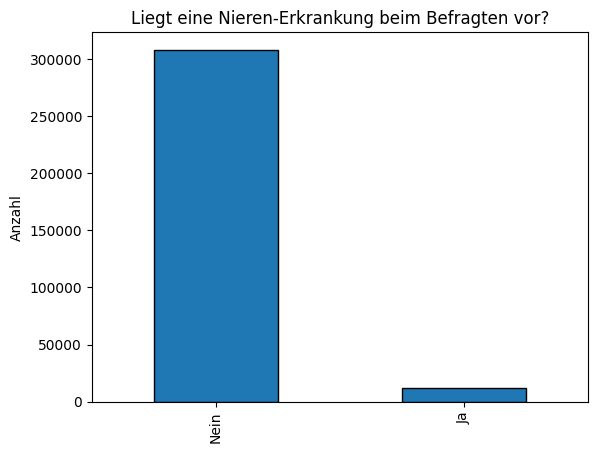

In [99]:
heart_data["KidneyDisease"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt eine Nieren-Erkrankung beim Befragten vor?')

plt.show()

## Hautkrebs

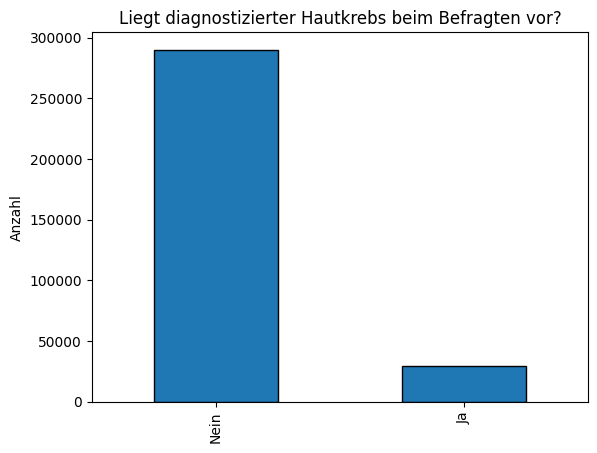

In [100]:
heart_data["SkinCancer"].value_counts().plot(kind="bar", edgecolor='black')

plt.xlabel("")
plt.ylabel('Anzahl')
plt.title('Liegt diagnostizierter Hautkrebs beim Befragten vor?')

plt.show()

# Bivariate Analyse
Beziehungen zwischen Variablen-Paaren, Muster oder Korrelationen identifizieren

## Heatmap: Physische und Psychische Gesundheit

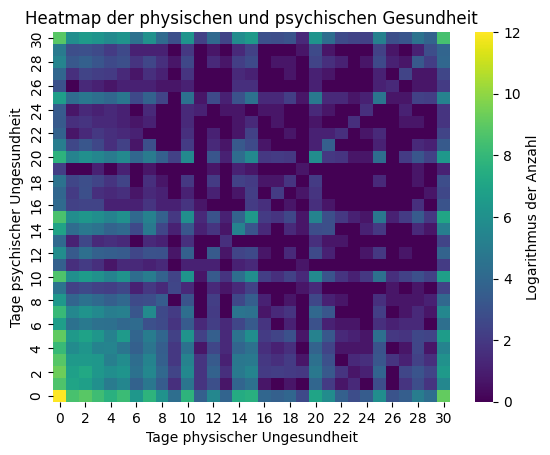

In [101]:
pivot_table = heart_data.pivot_table(index='MentalHealth', columns='PhysicalHealth', aggfunc='size', fill_value=0)

#Logartihmus auf Pivot-Table angewandt, dass die Darstellung besser erkennbar ist. Ohne diesen, sieht man nur Gelb unten Links und sonst ist alles dunkel
pivot_table = np.log1p(pivot_table)

#Visualisierung
sns.heatmap(pivot_table, cmap="viridis", cbar_kws={'label': 'Logarithmus der Anzahl'})
plt.ylim(0, len(pivot_table))
plt.title('Heatmap der physischen und psychischen Gesundheit')
plt.xlabel("Tage physischer Ungesundheit")
plt.ylabel("Tage psychischer Ungesundheit")

del pivot_table

plt.show()


In der Heatmap kann man die Korrelation von Tagen der phyischen und psychischen Ungesundheit der Befragten sehen. Es wurde der Logarithmus Naturalis auf die Tage angewandt, um so eine bessere Veranschaulichung zu erhalten.  
Die meisten Befragten haben 0 Tage physischer und psychischer Ungesundheit angegeben. Einige andere befinden sich noch im Bereich von 6 Tagen Ungesundheit in beide Achsen. Desweiteren gibt es noch einige Extreme, die sich bei 30 Tagen physischer und oder 30 Tagen psychischer Ungesundheit befinden, die man allerdings als Ausreißer bezeichnen kann.


## Bivariate Analyse mit Herzerkrankung
Wichtig für die manuelle Gewichtung aller Parameter für die spätere Bewertung des Risikos

### BMI

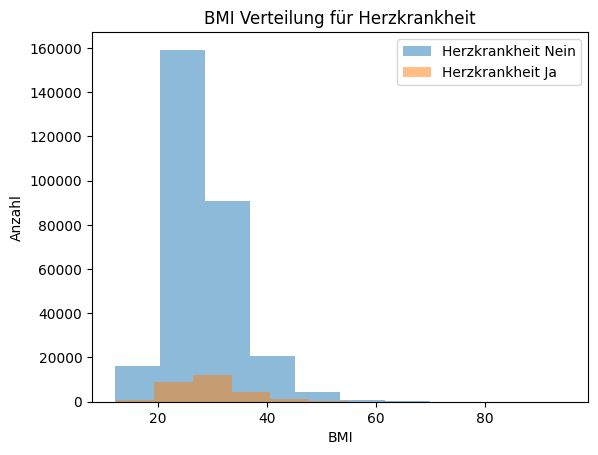

Der durschnittliche BMI bei Befragten ohne Herzerkrankung ist:  28.22
Der durschnittliche BMI bei Befragten mit Herzerkrankung ist:  29.4


In [102]:
# Aufteilen des DataFrames basierend auf 'HeartDisease'
ja = heart_data[heart_data['HeartDisease'] == 'Ja']
nein = heart_data[heart_data['HeartDisease'] == 'Nein']

# Visualisierung
plt.hist(nein['BMI'], alpha=0.5, label='Herzkrankheit Nein')
plt.hist(ja['BMI'], alpha=0.5, label='Herzkrankheit Ja')

plt.xlabel('BMI')
plt.ylabel('Anzahl')
plt.title('BMI Verteilung für Herzkrankheit')
plt.legend(loc='upper right')
plt.show()

# Durchschnittliche BMI für jede Kategorie berechnen
avg_bmi = heart_data.groupby('HeartDisease')['BMI'].mean()
print("Der durschnittliche BMI bei Befragten ohne Herzerkrankung ist: ", round(avg_bmi[1],2))
print("Der durschnittliche BMI bei Befragten mit Herzerkrankung ist: ", round(avg_bmi[0],2))


Die beiden durchschnittlichen BMI-Werte der Herzerkrankten und Nichtherzerkrankten sind so nah beieinander, dass es keinen Vorteil bietet diesen Parameter für die spätere Berechnung des Risikos zu nutzen.

### Rauchen

In [103]:
grouped_data = heart_data.groupby(['Smoking', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten rauchenden/nichtrauchenden Personen 
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Rauchen',
    xaxis=dict(title='Rauchend'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Dieser Plot verdeutlicht, dass man eine doppelt so hohe Wahrscheinlichkeit hat an einer Herzerkrankung zu leiden, wenn man raucht.  
Diese Zahl ist ausreichend hoch, um den Parameter "Rauchen" später in Betracht für die Berechnung des Risikos ziehen zu können.

### Alkoholkonsum

In [104]:
grouped_data = heart_data.groupby(['AlcoholDrinking', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Alkoholkonsum',
    xaxis=dict(title='Alkoholkonsument'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Ähnlich wie bei dem BMI ist die Differenz zwischen den nichtherzerkrankten und herzerkrankten Alkoholkonsumenten so gering, dass man diesen Parameter auch nicht in Betracht für die Berechnung des Risikos ziehen muss.  
Auffällig ist jedoch trotzdem, dass alkoholkonsumierende Personen weniger wahrscheinlich sind an einer Herzkrankheit zu leiden.

### Schlaganfall

In [105]:
grouped_data = heart_data.groupby(['Stroke', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Schlaganfällen',
    xaxis=dict(title='Hatte bereits einen Schlaganfall'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Es existieren circa fünfmal so viele Herzerkrankte, die einen Schlaganfall hatten, wie Nichtherzerkrankte, die einen Schlaganfall hatten.  
Das deutet auf eine starke Korrelation zwischen Herzkrankheit und Schlaganfall hin, wodurch der Parameter "Schlaganfall" in Betracht gezogen werden kann.

### Physische Gesundheit

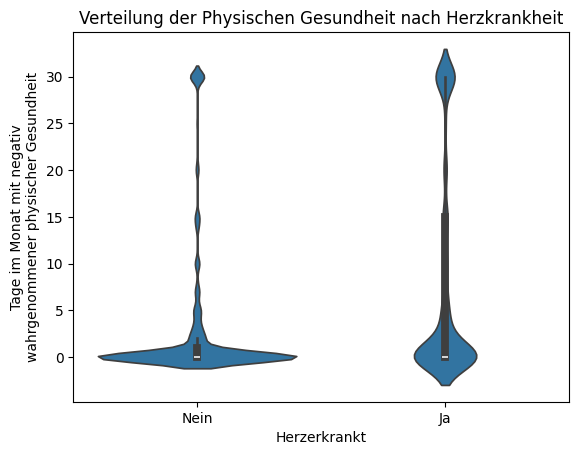

In [106]:
sns.violinplot(x="HeartDisease", y="PhysicalHealth", data=heart_data)

plt.title("Verteilung der Physischen Gesundheit nach Herzkrankheit")
plt.ylabel("Tage im Monat mit negativ\nwahrgenommener physischer Gesundheit")
plt.xlabel("Herzerkrankt")

plt.show()

Die Verteilung ist bei den Nichterkrankten und den Erkrankten sehr ähnlich.  
Sie haben dieselbe Form, nur dass die Erkrankten etwas weiter verteilt sind.  
Da die Visualisierungen sich jedoch so stark ähneln und es sich um einen stark subjektiven Parameter handelt, wird dieser nicht in die Bewertung aufgenommen.

### Mentale Gesundheit

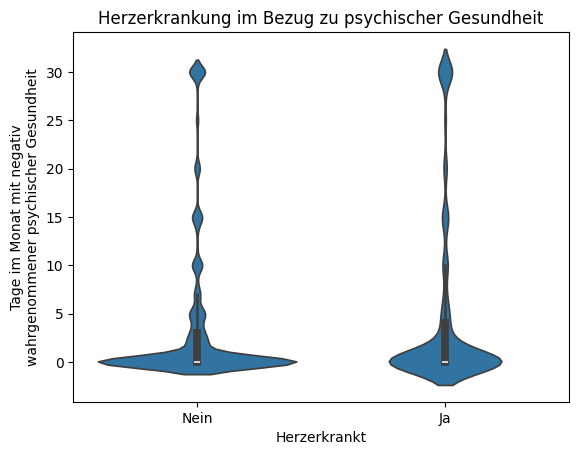

In [107]:
sns.violinplot(x="HeartDisease", y="MentalHealth", data=heart_data)

plt.title("Herzerkrankung im Bezug zu psychischer Gesundheit")
plt.ylabel("Tage im Monat mit negativ\nwahrgenommener psychischer Gesundheit")
plt.xlabel("Herzerkrankt")

plt.show()

Die Verteilung ist bei den Nichterkrankten und den Erkrankten sehr ähnlich.  
Sie haben dieselbe Form, nur dass die Erkrankten etwas weiter verteilt sind.  
Da die Visualisierungen sich jedoch so stark ähneln und es sich um einen stark subjektiven Parameter handelt, wird dieser nicht in die Bewertung aufgenommen.

### Treppensteigen

In [108]:
grouped_data = heart_data.groupby(['DiffWalking', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Schwierigkeit beim Treppensteigen',
    xaxis=dict(title='Schwierigkeiten beim Treppensteigen'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Der Graph zeigt, dass Menschen, die Schwierigkeiten haben Treppen zu steigen etwa viermal so wahrscheinlich an einer Herzerkrankung leiden, wie Menschen, die keine Schwierigkeiten haben.  
Dadurch wäre dies ebenfalls ein signifikanter Wert, den man für die Bewertung des Risikos miteinbeziehen kann.

### Geschlecht

In [109]:
grouped_data = heart_data.groupby(['Sex', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Geschlecht',
    xaxis=dict(title='Geschlecht'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Der Graph zeigt, dass Männer etwa 4% häufiger an einer Herzerkrankung leiden, als Frauen.  
Das zeigt auf, dass das Geschlecht eine Rolle für die Bewertung des Risikos besitzt, aber keine stark ausschlaggebende Rolle.

### Altersgruppen

In [110]:
grouped_data = heart_data.groupby(['AgeCategory', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen in jeder Alterskategorie
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color='rgb(55, 83, 109)'
))

fig.update_layout(
    title='Prozentsatz der Herzkrankheiten nach Alterskategorie',
    xaxis=dict(title='Alterskategorie'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Der Graph weist darauf hin, dass mit steigendem Alter die Wahrscheinlichkeit an einer Herzkrankheit zu erkranken um ein Vielfaches erhöht ist.  
Da der Prozentsatz in der Alterskategorie "80 oder älter" mehr als das 22-Fache der Kategorie "18-24" ist, ist die Alterskategorie als wichtiger Parameter für die Bewertung des Risikos zu sehen.

### Ethnie

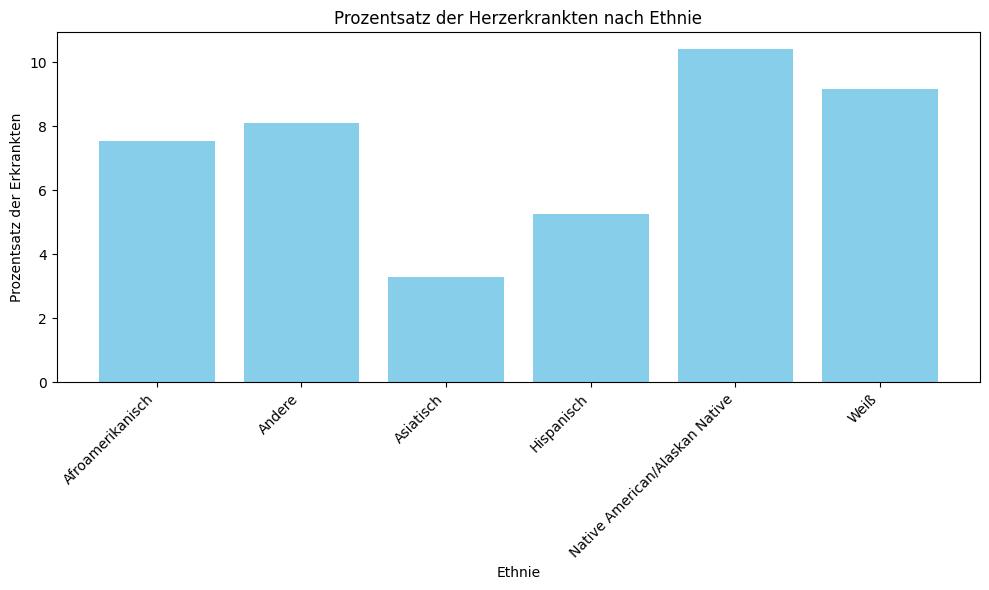

In [111]:
#Relative Berechnung von Herzerkrankung jeder Ethnie
total_per_ethnicity = heart_data['Race'].value_counts().sort_values(ascending=False)
heart_disease_per_ethnicity = heart_data[heart_data['HeartDisease'] == 'Ja']['Race'].value_counts().sort_values(ascending=False)
relative_frequency = (heart_disease_per_ethnicity / total_per_ethnicity) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(relative_frequency.index, relative_frequency.values, color='skyblue')
plt.xlabel('Ethnie')
plt.ylabel('Prozentsatz der Erkrankten')
plt.title('Prozentsatz der Herzerkrankten nach Ethnie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Man kann erkennen, dass die Ethnie eine gewisse Rolle bei der Wahrscheinlichkeit einer Herzerkrankung spielt.  
Jedoch ist das ein Parameter, welchen man als Individuum nicht ändern kann und somit unserem Projektziel nicht zusagt.  
Des Weiteren beträgt die höchste Prozentsatzdifferenz etwa 7%, was für keine sonderliche Signifikanz bei der Bewertung des Risikos spricht.

### Diabetes

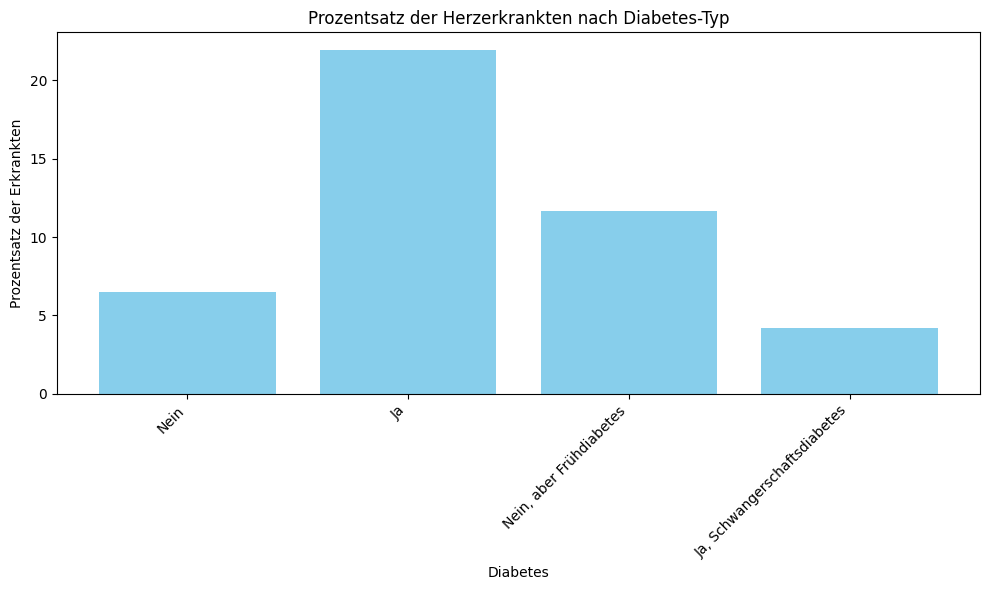

In [112]:
#Relative Berechnung von Herzerkrankung jedes Diabetestyps
total_per_diabetic = heart_data['Diabetic'].value_counts().sort_values(ascending=False)
heart_disease_per_diabetic = heart_data[heart_data['HeartDisease'] == 'Ja']['Diabetic'].value_counts().sort_values(ascending=False)
relative_frequency = (heart_disease_per_diabetic / total_per_diabetic) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(relative_frequency.index, relative_frequency.values, color='skyblue')
plt.xlabel('Diabetes')
plt.ylabel('Prozentsatz der Erkrankten')
plt.title('Prozentsatz der Herzerkrankten nach Diabetes-Typ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Der Graph weist darauf hin, dass Menschen mit Diabetes und Frühdiabetes eine erhöhte Wahrscheinlichkeit haben an einer Herzerkrankung zu leiden.  
Da die Differenz zwischen dem Prozentsatz für kein Diabetes und den anderen beiden Prozensätzen hoch genug ist, kann man den Parameter "Diabetes" in der Bewertung des Risikos nutzen.

### Physische Aktivität

In [113]:
grouped_data = heart_data.groupby(['PhysicalActivity', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu physischer Aktivität',
    xaxis=dict(title='In den letzten 30 Tagen physisch aktiv'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Der Graph zeigt auf, dass eine doppelt so hohe Wahrscheinlichkeit besteht an einer Herzkrankheit zu erkranken, wenn man in den letzten 30 Tagen nicht physisch aktiv war.  
Da dieser Parameter stark subjektiv ist, weil jedes Individuum "physisch aktiv" anders definieren kann, wird dieser mit einer niedrigen Priorität für die Bewertung des Risikos versehen.

### Generelle Gesundheit

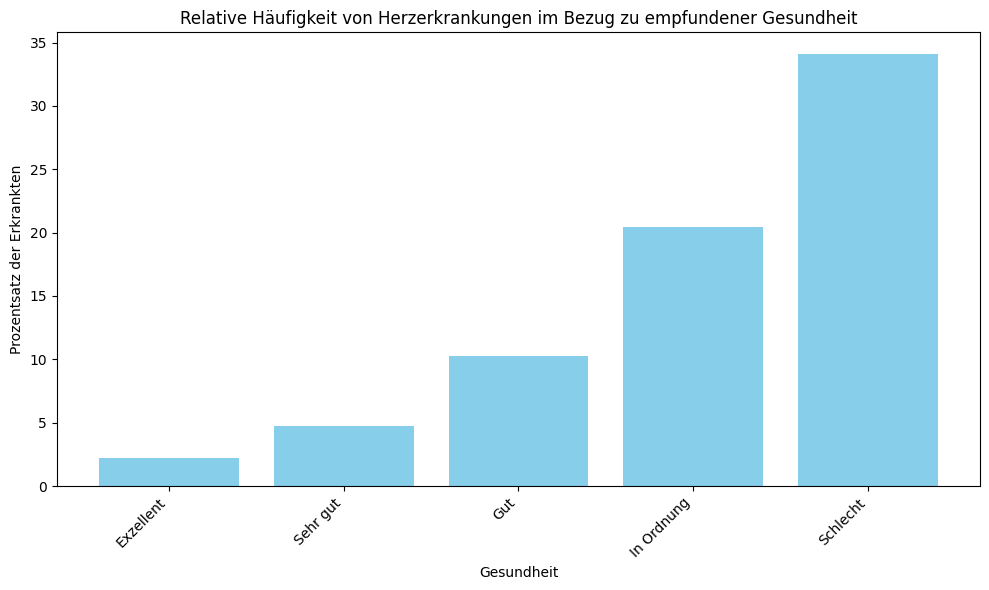

In [114]:
#Relative Berechnung von Herzerkrankung jede Gesundheitskategorie
total_per_health = heart_data['GenHealth'].value_counts().reindex(['Exzellent', 'Sehr gut', 'Gut', 'In Ordnung', 'Schlecht'])
heart_disease_per_health = heart_data[heart_data['HeartDisease'] == 'Ja']['GenHealth'].value_counts().reindex(['Exzellent', 'Sehr gut', 'Gut', 'In Ordnung', 'Schlecht'])
relative_frequency = (heart_disease_per_health / total_per_health) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
plt.bar(relative_frequency.index, relative_frequency.values, color='skyblue')
plt.xlabel('Gesundheit')
plt.ylabel('Prozentsatz der Erkrankten')
plt.title('Relative Häufigkeit von Herzerkrankungen im Bezug zu empfundener Gesundheit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

So wie physisch aktiv ist die empfundene Gesundheit auch stark subjektiv. Jedoch ist der Unterschied zwischen dem besten und dem schlechtesten Gesundheitszustand so hoch, dass man hier von einem signifikanten Parameter für die Bewertung des Risikos reden kann.  
Wichtig zu beachten ist jedoch auch, dass möglicherweise Befragte "In Ordnung" oder "Schlecht" angegeben haben, gerade weil sie eine Herzerkrankung haben. Dieser mögliche Bias muss bei der späteren Bewertung in Betracht gezogen werden.

### Schlafdauer

In [115]:
Q3 = np.percentile(heart_data["SleepTime"], 99.9)

heart_data_filtered = heart_data[heart_data["SleepTime"] <= Q3]
grouped_data = heart_data_filtered.groupby(['SleepTime', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen in jeder Alterskategorie
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color='rgb(55, 83, 109)'
))

fig.update_layout(
    title='Prozentsatz der Herzkrankheiten nach durchschnittlicher Schlafdauer in Stunden',
    xaxis=dict(title='Durchschnittliche Schlafdauer in Stunden'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()


Es ist eine wellenartige Form des Graphen zu erkennen, bei dem das Minimum bei 7 Stunden durchschnittlicher Schlafdauer liegt. Sowohl bei mehr als auch bei weniger Stunden Schlaf erhöht sich das Risiko an einer Herzkrankheit zu leiden stetig.  
An dieser Stelle ist es wichtig anzumerken, dass im Laufe der Analyse, der Verdacht entstand, dass ältere Menschen länger schlafen und deshalb mit steigender Schlafdauer auch die Wahrscheinlichkeit an einer Herzkrankheit zu leiden steigt. Dieser Verdacht wird später in dem Plot "Altersgruppe und Schlafdauer" genauer untersucht.  
Da der Unterschied auch ohne weitere Untersuchungen bei bis zu 12% liegt, viele andere Schlafdauern ebenfalls erhöhte Wahrscheinlichkeiten zu erkranken aufweisen und die Schlafdauer eine einfach messbare Variable ist, wird sie mit hoher Signifikanz für die Bewertung des Risikos versehen.

### Asthma

In [116]:
grouped_data = heart_data.groupby(['Asthma', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Asthma',
    xaxis=dict(title='Erkrankt an Asthma'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Bei einer etwa 3,5% höheren Wahrscheinlichkeit, bei bestehender Asthmaerkrankung, an einer Herzerkrankung zu leiden, ist die Differenz der beiden Werte so gering, dass keine eindeutige Signifikanz für die Berechnung des Risikos zu erkennen ist.  
Jedoch ist die Differenz hoch genug, um den Verdacht zu wecken, dass ein Zusammenhang zwischen dem Sauerstoffgehalt, der bei Asthma oft eingeschränkt/instabil ist, und der Herzerkrankung besteht. Zukunftig könnte also ein "Sauerstoffsättigung"-Parameter ebenfalls in die Bewertung des Risikos miteinbezogen werden oder andere Erkrankungen, wie zum Beispiel die Schlafapnoe, im Zusammenhang beleuchtet werden.

### Nieren-Erkrankung

In [117]:
grouped_data = heart_data.groupby(['KidneyDisease', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu einer Nierenerkrankung',
    xaxis=dict(title='Hat eine Nierenerkrankung'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Es existieren circa viermal so viele Herzerkrankte, die an einer Nierenerkrankung leiden, wie Nichtherzerkrankte, die an einer Nierenerkrankung leiden.  
Das deutet auf eine starke Korrelation zwischen Herzkrankheit und Nierenerkrankung hin, wodurch der Parameter "Nierenerkrankung" in Betracht gezogen werden kann.

### Hautkrebs

In [118]:
grouped_data = heart_data.groupby(['SkinCancer', 'HeartDisease']).size().unstack(fill_value=0)

# Berechnen des Prozentsatzes der erkrankten Personen
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data['Percent_Yes'] = grouped_data['Ja'] / grouped_data['Total'] * 100

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data.index,
    y=grouped_data['Percent_Yes'],
    name='Erkrankte',
    marker_color=['#0099ab','#005059']
))

fig.update_layout(
    title='Prozentsatz der Herzerkrankten im Bezug zu Hautkrebs',
    xaxis=dict(title='Erkrankt an Hautkrebs'),
    yaxis=dict(title='Prozentsatz der Erkrankten'),
    showlegend=False
)

fig.show()

Es existieren circa doppelt so viele Herzerkrankte, die Hautkrebs hatten, wie Nichtherzerkrankte, die Hautkrebs hatten.  
Das deutet auf eine kleine Korrelation zwischen Herzkrankheit und Hautkrebs hin, wodurch der Parameter "Hautkrebs" in Betracht gezogen werden kann. Dieser ist jedoch wesentlich insignifikanter als andere Parameter wie zum Beispiel der Schlaganfall oder die Nierenerkrankung. Deshalb ist es weniger zielführend den Parameter "Hautkrebs" mit in die Bewertung einzubeziehen.

## Altersgruppe und Schlafdauer

In [119]:
Q3 = np.percentile(heart_data["SleepTime"], 99.9)

heart_data_filtered = heart_data[heart_data["SleepTime"] <= Q3]

#Summe und Anzahl der Alterskategorien im Zusammenhang zu Schlafdauer
grouped_data = heart_data_filtered.groupby('AgeCategory')['SleepTime'].agg(['count', 'sum']).reset_index()
grouped_data['AvgSleepTime'] = grouped_data['sum'] / grouped_data['count']

# Visualisierung
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['AgeCategory'],
    y=grouped_data["AvgSleepTime"],
    marker_color='rgb(55, 83, 109)'
))

fig.update_layout(
    title='Schlafdauer nach Alterskategorie',
    xaxis=dict(title='Alterskategorie'),
    yaxis=dict(
        title='Durchschnittliche Schlafdauer'  # Anpassen des Bereichs
    ),
    showlegend=False
)

fig.show()

Anhand dieses Graphen ist der Verdacht von "Bivariate Analyse mit Herzerkrankung - Schlafdauer", dass ältere Menschen länger schlafen, sehr gut zu widerlegen. Denn dieser zeigt eindeutig, dass nur kleine, insignifikante Differenzen zwischen den Altersgruppen und den Schlaufdauern existieren.  
Durch die Unabhängigkeit der Schlafdauer vom Alter, kann diese noch stärker bei der Bewertung gewichtet werden, da Betroffene aktiv was an ihrem Schlafverhalten ändern können.

# Multivariative Analyse
Wechselwirkungen zwischen mehreren Variablen gleichzeitig erkennen (Dies erweist sich jedoch aufgrund der kategoriellen Natur unserer Daten als schwierig)

## Herzerkrankung mit genereller Gesundheit und der physischen Aktivität

In [120]:
grouped_data = heart_data.groupby(['HeartDisease', 'GenHealth', 'PhysicalActivity']).size().reset_index(name='count')

# Visualisierung

def color_function(path_value):
    if path_value == "Low":
        return '#FF0000'  # Red for "Low"
    elif path_value == "Medium":
        return '#FFFF00'  # Yellow for "Medium"
    else:
        return '#00FF00'  # Green for "High"
    
fig = px.sunburst(grouped_data, path=['HeartDisease', 'GenHealth', 'PhysicalActivity'], values='count',
                  title='Herzerkrankung im Bezug zur empfundenen generellen Gesundheit und der physischen Aktivität',
                  hover_data={'count': False, 'HeartDisease': True, 'GenHealth': True, 'PhysicalActivity': True},
                  labels={'count': 'Häufigkeit'}
                  )

fig.update_layout(font=dict(size=16),
                  title=dict(
                    font=dict(size=15)
                    ),
                    
                )


fig.update_layout(margin=dict(t=60, b=60, l=60, r=60),
                  width=800, height=800)

fig.show()

Im Sunburstgraph ist von innen nach außen zu erkennen, dass die empfundene generelle Gesundheit bei Nichterkrankten überdurchschnittlich hoch bewertet ist. Desweiteren ist zu erkennen, dass die meisten von diesen Befragten sich in den letzen 30 Tagen sportlich betätigt haben.  
Die empfundenene generelle Gesundheit bei den Herzerkrankten ist jedoch überdurchschnittlich niedrig bewertet (mehr als 33% schlechte oder "in Ordnung" empfundene Gesundheit). Des Weiteren ist hier besonders auffällig, dass je schlechter es der Person geht, desto wahrscheinlicher sie keinen Sport in den letzten 30 Tagen gemacht hat.  
Man könnte die Prognose stellen, dass Personen, denen es grundsätzlich schlechter geht, auch weniger Sport machen, insbesondere, wenn sie an einer Herzerkrankung leiden.

## Zusammenhang von physischer sowie psychischer Gesundheit und physischer Aktivität

In [121]:
def categorize_column(column):
    categories = [f"{i}-{(i+10)}" for i in range(0, 30, 10)]
    return pd.cut(column, 3, labels=categories)

heart_data_copy = heart_data.copy()
heart_data_copy["PhysicalHealth"] = categorize_column(heart_data_copy["PhysicalHealth"])
heart_data_copy["MentalHealth"] = categorize_column(heart_data_copy["MentalHealth"])

# Gruppieren der Daten und Zählen der Datensätze
grouped_data = heart_data_copy.groupby(['PhysicalHealth', 'MentalHealth', 'PhysicalActivity']).size().reset_index(name='Anzahl')

#Umbenennen der Spaltennamen für bessere Lesbarkeit
grouped_data = grouped_data.rename(columns={"PhysicalHealth": "Tage physischer Ungesundheit",
                                            "MentalHealth": "Tage mentaler Ungesundheit",
                                            "PhysicalActivity": "Physische Aktivität"})

# Anzeigen der Tabelle
print(grouped_data.to_string())

   Tage physischer Ungesundheit Tage mentaler Ungesundheit Physische Aktivität  Anzahl
0                          0-10                       0-10                  Ja  209115
1                          0-10                       0-10                Nein   48605
2                          0-10                      10-20                  Ja   11378
3                          0-10                      10-20                Nein    2979
4                          0-10                      20-30                  Ja    9505
5                          0-10                      20-30                Nein    3523
6                         10-20                       0-10                  Ja    5192
7                         10-20                       0-10                Nein    3063
8                         10-20                      10-20                  Ja    1215
9                         10-20                      10-20                Nein     863
10                        10-20            

Man muss die Tabelle in Form Dupeln betrachten (Index 0 und Index 1, Index 2 und Index 3, etc.)  
Wenn man sich die Anzahl der Befragten anschaut, sieht man dass die Mehrzahl an Leuten, die gleich viele Tage physischer und mentaler Ungesundheit hatten, sportlich aktiv waren (im ersten Dupel etwa viermal so viele wie nicht sportlich aktiv). Wenn man dies jedoch für die weiteren Dupel fortführt, kann man erkennen, dass die Werte der Anzahl sich immer näher kommen und am Ende sogar mehr nicht sportlich aktive Menschen gibt.  
Durch diesen Trend kann man also herleiten, dass je schlechter es der Person, egal ob mental oder physisch, es immer wahrscheinlicher wird, dass die Person sich nicht sportlich betätigt.

# Relevante Parameter für die Berechnung des Risikos (manuell)

Nach manueller Abwägung und Inbetrachtnahme der vorrangegangenen Visualisierungen ergab sich, dass folgende 5 Parameter sich am Besten für die Berechnung des Risikos eignen:  
- Schlaganfall
- Altersgruppe
- Generelle Gesundheit
- Schlafdauer
- Nierenerkrankung

Diese Parameter sind sinnvoll, wobei nur einer, nämlich die generelle Gesundheit, subjektiv ist und man somit ein genaues Ergebnis sichern kann. Ein weiterer Grund sind die Projektziele, denn alle Parameter kann man über Wearables irgendwie tracken oder speichern.  
Um jedoch sicher zu gehen, dass die Parameter sich wirklichen eigenen, werden diese später noch mithilfe von PCA bestätigt oder widerlegt.

# Statistik und Mathematik

## Logistische Regression

In [122]:
heart_data_copy = heart_data.copy()

# Mapping der Alterskategorien auf Zahlen von 1-13
age_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 oder älter': 13
}
heart_data_copy['AgeCategory'] = heart_data['AgeCategory'].map(age_mapping)

# Zielvariable in binäre Werte umwandeln
heart_data_copy['HeartDisease'] = heart_data['HeartDisease'].map({'Ja': 1, 'Nein': 0})

# Merkmale (X) und Zielvariable (y) definieren
X = heart_data_copy[['AgeCategory']]
y = heart_data_copy['HeartDisease']

# Daten in Trainings- und Testdatensatz aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistische Regression trainieren
model = LogisticRegression() # ohne class_weight="balanced" - präzi von 92%
model.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test)

# Ergebnisse auswerten
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

print("Genauigkeit:", accuracy)
print("Konfusionsmatrix:\n", conf_matrix)
print("Klassifikationsbericht:\n", class_report)

# Einzelwert testen
# Beispiel: Ein 55-jähriger Patient
single_test_value = pd.DataFrame({'AgeCategory': [age_mapping['65-69']]})

# Vorhersage für den Einzelwert
single_prediction = model.predict(single_test_value)
single_prediction_proba = model.predict_proba(single_test_value)

#print("Vorhersage für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit):", single_prediction[0])
#print("Wahrscheinlichkeiten für Einzelwert (0 = Keine Herzkrankheit, 1 = Herzkrankheit):", single_prediction_proba[0])

Genauigkeit: 0.9125689895089042
Konfusionsmatrix:
 [[58367     0]
 [ 5592     0]]
Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       1.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.96      0.50      0.48     63959
weighted avg       0.92      0.91      0.87     63959



Die bisherige Genauigkeit liegt bei knapp 91,26%. Diese soll noch auf 98% gesteigert werden, da unser Team jedoch noch am Testen von verschiedenen Statistikmodellen ist, konnte die Genauigkeit dieser logistiscchen Regression mit dem Parameter der Alterskategorie noch nicht verbessert werden.

Text(0.5, 427.9555555555555, 'Predicted label')

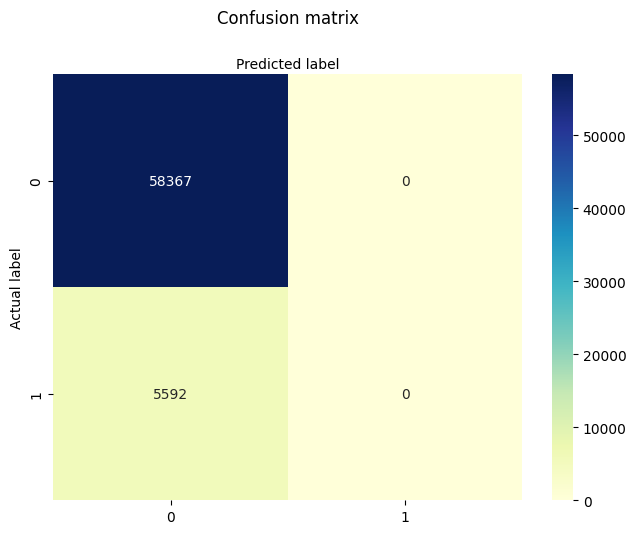

In [123]:
class_names=[0,1] # name  of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Visualisierung
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')